<a href="https://colab.research.google.com/github/lalevesque95/bootcamp/blob/master/CSC_857_B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mounting drive to google, necessary to get files from drive. 
#Something will pop up with url to get authorization code and then enter it
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install biopython


     |████████████████████████████████| 2.3MB 5.7MB/s 


In [ ]:
#Read in Expression Data
import numpy as np
d = []
with open('/content/drive/My Drive/CSC_857_Project_B4/yeastEx.txt', 'r') as f:
  for l in f:
    d.append(l.split())
df = np.array(d).astype(np.float)

names = []
with open('/content/drive/My Drive/CSC_857_Project_B4/yeastNames.txt', 'r') as f:
  for l in f:
    names.append(l.strip())
def rm_col(df, x):
  n = df.shape[1]
  l = []
  for y in range(n):
    if y != x:
      l.append(y)
  return df[:, l]

a = np.array([[1,2,3], [4,5,6]])
np.mean(df, axis = 0)
float(a.shape[1])

3.0

In [ ]:
#Making dictionary w/ genes & all expressions
master_dict = {}
for i in range(2882):
  master_dict[names[i]] = df[i]
print(master_dict)

In [ ]:
#FOM analysis for kmeans
import numpy as np
import math
from Bio import Cluster
fom_plot_kmeans = {}
for x in range(1,101):
  n = float(df.shape[0])
  m = float(df.shape[1])
  fom_agg = 0
  for e in range(df.shape[1]):
    df_kmeans = Cluster.kcluster(rm_col(df, e), nclusters=x, mask=None, weight=None
				, transpose=False, npass=1, method='a', dist='e', initialid=None)
    b = 0
    for k in range(x):
      genes = np.where(df_kmeans[0] == k)[0].tolist()
      mu = np.mean(df[genes, :], axis = 0)[e]
      a = 0
      for g in genes:
        r = df[g,e]
        a += (r - mu)**2
      b += a
    fom = math.sqrt((1/n)*b)
    fom_adj = fom/(math.sqrt(n-x/n))
    fom_agg += fom_adj
  fom_plot_kmeans[x] = fom_agg
  print(x)
fom_plot_kmeans



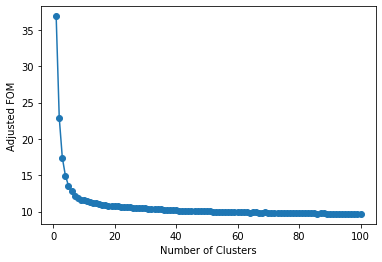

In [ ]:
#Plot adjusted FOM vs. #clusters for kmeans
import matplotlib.pylab as plt

lists = sorted(fom_plot_kmeans.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted FOM')

plt.savefig("/content/drive/MyDrive/CSC_857_Project_B4/Yeast_cluster_kmeans_fom.png")

In [ ]:
#Determine threshold of stability of FOM for kmeans
import pandas as pd
from Bio import Cluster
fom_plot_kmeans_stab = {}
for x in range(1,97):
  l = [*range(x, x+5)]
  foms = []
  for y in l:
    foms.append(fom_plot_kmeans.get(y))
  fom_mean = sum(foms)/len(foms)
  fom_var = sum([((z - fom_mean)**2) for z in foms])/len(foms)
  fom_sd = fom_var**0.5
  fom_cv = abs(fom_sd/fom_mean)
  fom_plot_kmeans_stab[x] = fom_cv

fom_plot_kmeans_stab

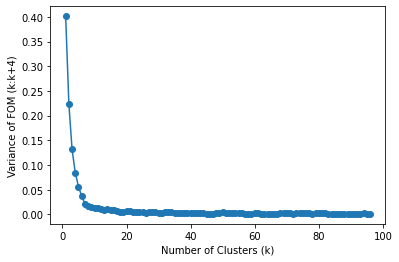

In [ ]:
# Plot FOM cv vs #of clusters of kmeans

import matplotlib.pylab as plt

lists = sorted(fom_plot_kmeans_stab.items())

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Variance of FOM (k:k+4)')

plt.savefig("/content/drive/MyDrive/CSC_857_Project_B4/Yeast_cluster_kmeans_FOM_cv.png")

In [ ]:
#Determine best number of clusters for kmeans via rand
import pandas as pd
from Bio import Cluster
from sklearn.metrics.cluster import adjusted_rand_score
ari_plot_kmeans = {}
for x in range (1,101):
  df_kmeans = Cluster.kcluster(df, nclusters=x, mask=None, weight=None
				, transpose=False, npass=1, method='a', dist='e', initialid=None)
  cho_df = pd.read_csv('/content/drive/My Drive/CSC_857_Project_B4/Cho_Grouping.csv')
  cho_df.columns = ['gene_id', 'cho_group']
  df_kmeans_d = {'gene_id': names, 'km_clust': list(df_kmeans[0])}
  kmeans_df = pd.DataFrame(df_kmeans_d)
  all_df = cho_df.merge(kmeans_df)
  ari_kmeans = adjusted_rand_score(all_df['cho_group'].tolist(), all_df['km_clust'].tolist())
  ari_plot_kmeans[x] = ari_kmeans
  print(x)
ari_plot_kmeans


In [ ]:
#Determine threshold of stability of ARI for kmeans
import pandas as pd
from Bio import Cluster
ari_plot_kmeans_stab = {}
for x in range(1,97):
  l = [*range(x, x+5)]
  aris = []
  for y in l:
    aris.append(ari_plot_kmeans.get(y))
  ari_mean = sum(aris)/len(aris)
  ari_var = sum([((z - ari_mean)**2) for z in aris])/len(aris)
  ari_sd = ari_var**0.5
  ari_cv = abs(ari_sd/ari_mean)
  ari_plot_kmeans_stab[x] = ari_cv

ari_plot_kmeans_stab

NameError: ignored

In [ ]:
#Plot ARI vs # of clusters for kmEANS
import matplotlib.pylab as plt

lists = sorted(ari_plot_kmeans.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Rand Index')

plt.savefig("/content/drive/MyDrive/CSC_857_Project_B4/Yeast_cluster_kmeans_ARI.png")
print(ari_plot_kmeans)
print(y.index(max(y)))

NameError: ignored

{1: 3.5212774217037093, 2: 2.3847125993225755, 3: 1.4398528533412975, 4: 1.397856492022231, 5: 1.4452981081108465, 6: 3.2760714030527947, 7: 1.565353320567355, 8: 0.9442101452449698, 9: 0.5700575695551038, 10: 0.1541763559217603, 11: 0.1344946971762431, 12: 0.11780448392959779, 13: 0.09818310702922171, 14: 0.10198658272617037, 15: 0.07024698162338588, 16: 0.07763651297738311, 17: 0.07489831115415439, 18: 0.05765737700593569, 19: 0.07281016490314911, 20: 0.07361904273059314, 21: 0.05848775311528727, 22: 0.05011090271636967, 23: 0.08010813167176589, 24: 0.07769474081852137, 25: 0.1097763361524683, 26: 0.11580880410577149, 27: 0.12530203953402205, 28: 0.11042782156142682, 29: 0.11057548514823622, 30: 0.1229518046009159, 31: 0.1344843426077694, 32: 0.16360569929504265, 33: 0.15912302662831224, 34: 0.1597993542521111, 35: 0.16466655468241082, 36: 0.09120239356494482, 37: 0.13441977537534114, 38: 0.1990312573649756, 39: 0.19657220030034708, 40: 0.19343316387871792, 41: 0.19319883734641416, 4

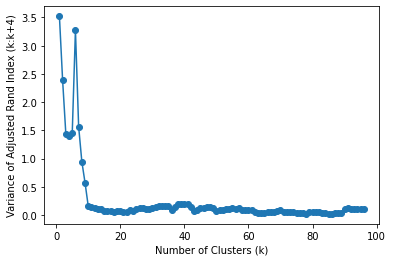

In [ ]:
# Plot ARI cv vs #of clusters of kmeans

import matplotlib.pylab as plt

lists = sorted(ari_plot_kmeans_stab.items())

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Variance of Adjusted Rand Index (k:k+4)')

plt.savefig("/content/drive/MyDrive/CSC_857_Project_B4/Yeast_cluster_kmeans_ARI_cv.png")

print(ari_plot_kmeans_stab)

In [ ]:
#Generate clusters using kmeans, k = 14
import numpy as np
import math
from Bio import Cluster
df_kmeans = Cluster.kcluster(df, nclusters=14, mask=None, weight=None
				, transpose=False, npass=1, method='a', dist='e', initialid=None)
kmeans_dict = {}
kmeans_size = {}
for k in range(24):
      genes = np.where(df_kmeans[0] == k)[0].tolist()
      kmeans_size[k] = len(genes)

print(kmeans_size)
for name in names:
  x = names.index(name)
  kmeans_dict[name] = df_kmeans[0][x]
#print(kmeans_dict)

with open('/content/drive/MyDrive/CSC_857_Project_B4/kmeans_clusters.csv', 'w') as f:
    for key in kmeans_dict.keys():
        f.write("%s,%s\n"%(key,kmeans_dict[key]))

{0: 280, 1: 271, 2: 158, 3: 299, 4: 240, 5: 113, 6: 305, 7: 249, 8: 224, 9: 69, 10: 139, 11: 280, 12: 172, 13: 83, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0}


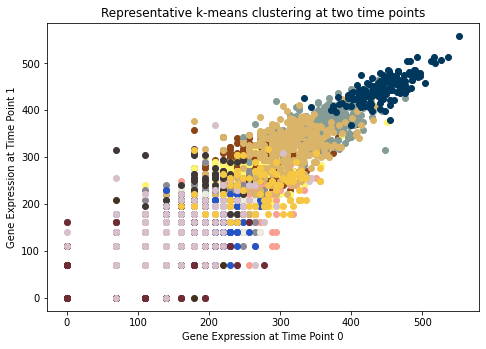

<Figure size 432x288 with 0 Axes>

In [ ]:
#Representative scatter plot for k-means clustering
import matplotlib.pyplot as plt
cluster = kmeans_dict
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
t1 = 0
t2 = 1
ax.set_xlabel('Gene Expression at Time Point {}'.format(t1))
ax.set_ylabel('Gene Expression at Time Point {}'.format(t2))
ax.set_title('Representative k-means clustering at two time points')
colors = ['#8b4516','#fdf56d','#f8a193','#8b8991','#849b96','#ecebdf','#d9b469','#2554c7','#43301d','#403737','#00375d','#6e2c35','#d8bfcc','#f6c745','#cc92ba','#859de4','#564a6f','#425b5e','#00b1e7','#afca0a','#c9cad3','#66ff66','#56338c','#cf3476']
#labels = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
for i in range(14):
  for gene, clust in cluster.items():
    if clust == i:
      newX = master_dict.get(gene)[t1]
      newY = master_dict.get(gene)[t2]
      ax.scatter(newX, newY, color = colors[i])  
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
plt.savefig("/content/drive/MyDrive/CSC_857_Project_B4/Yeast_cluster_kmeans_scatter_t0t1.png")

In [ ]:
#Generate clusters from k neighborhood graphs
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

def knn_init(df, num):
#Connect Each gene to N nearest Neighbors
  nbrs = NearestNeighbors(n_neighbors= num, algorithm='ball_tree').fit(df)
  distances, indices = nbrs.kneighbors(df)
  indices
  distances
  arr_neigh_a = nbrs.kneighbors_graph(df).toarray()
  return arr_neigh_a

def knn_bid(arr_neigh_a):
  # only include bidectional connections
  arr_neigh_b = np.zeros(arr_neigh_a.shape)
  for x in range(arr_neigh_a.shape[0]):
    for y in range(arr_neigh_a.shape[1]):
      if ((arr_neigh_a[x][y]) == 1 and (arr_neigh_a[y][x] == 1)):
        arr_neigh_b[x][y] = 1
        arr_neigh_b[y][x] = 1
  cluster = 0
  neigh_clust = {}
  ignore = []
  for x in range(arr_neigh_b.shape[0]):
    if x not in ignore:
      l = list(arr_neigh_b[x])
      n = []
      for z, y in enumerate(l):
        if y == 1:
          n.append(z)
          ignore.append(z)
      neigh_clust[cluster] = n
      cluster += 1
  return neigh_clust

def clust_rm(d, g):
  #Remove clusters in dictionary that have less than g genes
  df = {}
  for x in d: 
    l = neigh_clust.get(x)
    if len(l) >= g:
      df[x] = l
  return df

def knn_dict_trans(neigh_clust_final):
  #Create dictionary where keys are genes and values are lists of clusters where Gene belongs
  knn_dict = {}
  for c in neigh_clust_final:
    for g in neigh_clust_final.get(c):
      if names[g] in knn_dict:
        knn_dict[names[g]].append(c)
      else:   
        knn_dict[names[g]] = [c]
  return knn_dict

def avg_euc(dfx, g, others):
  #Determine avg eucledian distance between gene g and others
  total = 0
  for other in others:
    total += distance.euclidean(dfx[g], dfx[other])
  return total/len(others)

def knn_reclust (knn_dict, neigh_clust_final):
  #For genes that are assigned to more than 1 cluster, determine closest cluster (average eucledian distance) and assign gene to that
  for key in knn_dict:
    if len(knn_dict.get(key)) > 1:
      clusts = knn_dict.get(key)
      avg_eucs = []
      for clust in clusts:
        others = neigh_clust_final.get(clust)
        avg_eucs.append(avg_euc(df, names.index(key), others))
        others.remove(names.index(key))
      euc_min = avg_eucs.index(min(avg_eucs))
      knn_dict[key] = [clusts[euc_min]]
      neigh_clust_final[clusts[euc_min]].append(names.index(key))
  return knn_dict, neigh_clust_final

In [ ]:
#Number of Clusters for NNN
import numpy as np
import math
from Bio import Cluster
nclust_plot_knn = {}
for num in range (5,2006, 200):
  arr_neigh_a = knn_init(df,num)
  neigh_clust = knn_bid(arr_neigh_a)
  neigh_clust_final = clust_rm(neigh_clust, 5)
  knn_dict = knn_dict_trans(neigh_clust_final)
  knn_dict, neigh_clust_final = knn_reclust(knn_dict, neigh_clust_final)
  nclust_plot_knn[num] = [len(neigh_clust_final.keys())]
  print(num)


5
205
405
605
805
1005
1205
1405
1605
1805
2005


{5: [98], 205: [114], 405: [55], 605: [32], 805: [20], 1005: [12], 1205: [9], 1405: [6], 1605: [5], 1805: [5], 2005: [4]}


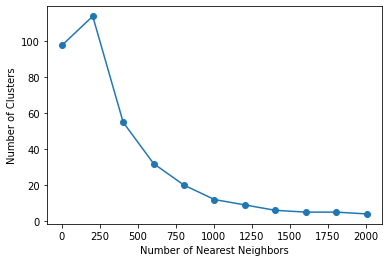

In [ ]:
# Plot # Of Clusters vs # of nearest neighbors for NNN

import matplotlib.pylab as plt

lists = sorted(nclust_plot_knn.items())

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y, marker='o')
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Number of Clusters')

plt.savefig("/content/drive/MyDrive/CSC_857_Project_B4/Yeast_cluster_knn_Clust_vs_N.png")

print(nclust_plot_knn)

In [ ]:
#FOM for KNN, range 305 to 2005
import numpy as np
import math
from Bio import Cluster
fom_plot_knn = {}
for num in range(305,2006,100):
  n = float(df.shape[0])
  m = float(df.shape[1])
  fom_agg = 0
  for e in range(df.shape[1]):
    print(num,e)
    arr_neigh_a = knn_init(rm_col(df,e),num)
    neigh_clust = knn_bid(arr_neigh_a)
    knn_dict = knn_dict_trans(neigh_clust)
    knn_dict, neigh_clust_final = knn_reclust(knn_dict, neigh_clust)
    df_knn = []
    for name in names:
      if name in knn_dict.keys():
        df_knn.append(str(knn_dict.get(name)[0]))
      else:
        df_knn.append('NA')
    df_knn = np.array(df_knn)
    b = 0
    for k in neigh_clust_final.keys():
      genes = np.where(df_knn == str(k))[0].tolist()
      mu = np.mean(df[genes, :], axis = 0)[e]
      a = 0
      for g in genes:
        r = df[g,e]
        a += (r - mu)**2
      b += a
    fom = math.sqrt((1/n)*b)
    fom_adj = fom/(math.sqrt(n-len(neigh_clust_final.keys())/n))
    fom_agg += fom_adj
  fom_plot_knn[num] = [fom_agg, len(neigh_clust_final.keys())]
fom_plot_knn

305 0
305 1
305 2
305 3
305 4
305 5
305 6
305 7
305 8
305 9
305 10
305 11
305 12
305 13
305 14
305 15
305 16
405 0
405 1
405 2
405 3
405 4
405 5
405 6
405 7
405 8
405 9
405 10
405 11
405 12
405 13
405 14
405 15
405 16
505 0
505 1
505 2


In [ ]:
#Fom Plot for KNN, ranges 305 to 2005
import matplotlib.pylab as plt

lists = sorted(fom_plot_knn.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
y1 = [yx[0] for yx in y]
y2 = [yx[1] for yx in y]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Number of Neighbors')
ax1.set_ylabel('Adjust FOM', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Number of Clusters', color=color)
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show
plt.savefig("/content/drive/MyDrive/CSC_857_Project_B4/Yeast_cluster_nnn_fom_305_2005.png")
fom_plot_knn

ValueError: ignored

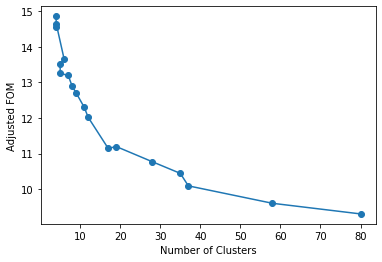

In [ ]:
# Plot Adjusted FOM vs. # of Clusters for NNN
plt.plot(y2, y1, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted FOM')
plt.show
plt.savefig("/content/drive/MyDrive/CSC_857_Project_B4/Yeast_cluster_nnn_305_2005_FOMvsClusters.png")

In [12]:
#Determine best number of neighbors for knn: range 305 to 2005 via rand
import pandas as pd
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

ari_plot_knn = {}
for num in range (305,2006, 100):
  arr_neigh_a = knn_init(df,num)
  neigh_clust = knn_bid(arr_neigh_a)
  neigh_clust_final = clust_rm(neigh_clust, 5)
  knn_dict = knn_dict_trans(neigh_clust_final)
  knn_dict, neigh_clust_final = knn_reclust(knn_dict, neigh_clust_final)
  
  #Compare KNN clustering to cho groups
  knn_d = {'gene_id': [], 'knn_clust': []}
  for gene, clust in knn_dict.items():
    knn_d['gene_id'].append(gene)
    knn_d['knn_clust'].append(clust[0])
  knn_df = pd.DataFrame(knn_d)
  cho_df = pd.read_csv('/content/drive/My Drive/CSC_857_Project_B4/Cho_Grouping.csv')
  cho_df.columns = ['gene_id', 'cho_group']
  all_df = cho_df.merge(knn_df)
  ari_knn = adjusted_rand_score(all_df['cho_group'].tolist(), all_df['knn_clust'].tolist())
  ari_plot_knn[num] = [ari_knn, len(neigh_clust_final.keys())]
  print(num)
ari_plot_knn


305
405
505
605
705
805
905
1005
1105
1205
1305
1405
1505
1605
1705
1805
1905
2005


{305: [0.08914132172874259, 77],
 405: [0.11235697026516658, 55],
 505: [0.10866676296139968, 41],
 605: [0.07878809834619745, 32],
 705: [0.09685168863214427, 26],
 805: [0.049268951976765146, 20],
 905: [0.07401494406103808, 19],
 1005: [0.07562855030933889, 12],
 1105: [0.07014330606685852, 10],
 1205: [0.11729127826318321, 9],
 1305: [0.08803899943659123, 9],
 1405: [0.004691896811812809, 6],
 1505: [-0.012796107619047982, 6],
 1605: [-0.009264817721075293, 5],
 1705: [-0.008715015205699207, 5],
 1805: [-0.02033876777403117, 5],
 1905: [-0.01603793143160124, 4],
 2005: [-0.019094175376647746, 4]}

{305: [0.08914132172874259, 77],
 405: [0.11235697026516658, 55],
 505: [0.10866676296139968, 41],
 605: [0.07878809834619745, 32],
 705: [0.09685168863214427, 26],
 805: [0.049268951976765146, 20],
 905: [0.07401494406103808, 19],
 1005: [0.07562855030933889, 12],
 1105: [0.07014330606685852, 10],
 1205: [0.11729127826318321, 9],
 1305: [0.08803899943659123, 9],
 1405: [0.004691896811812809, 6],
 1505: [-0.012796107619047982, 6],
 1605: [-0.009264817721075293, 5],
 1705: [-0.008715015205699207, 5],
 1805: [-0.02033876777403117, 5],
 1905: [-0.01603793143160124, 4],
 2005: [-0.019094175376647746, 4]}

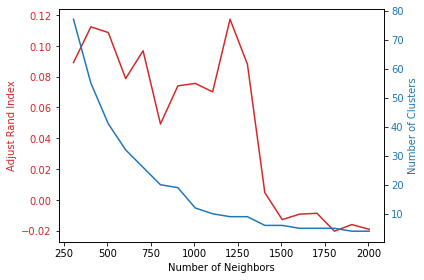

In [18]:
#Plot ARI vs. # KNN Neighbors: range 305 to 2005 
import matplotlib.pylab as plt

lists = sorted(ari_plot_knn.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
y1 = [yx[0] for yx in y]
y2 = [yx[1] for yx in y]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Number of Neighbors')
ax1.set_ylabel('Adjust Rand Index', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Number of Clusters', color=color)
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show
plt.savefig("/content/drive/MyDrive/CSC_857_Project_B4/Yeast_cluster_nnn_ari_305_2005.png")
ari_plot_knn

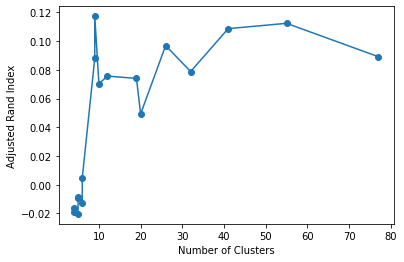

In [14]:
# Plot ARI vs. # of Clusters for NNN
plt.plot(y2, y1, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Rand Index')
plt.show
plt.savefig("/content/drive/MyDrive/CSC_857_Project_B4/Yeast_cluster_nnn_305_2005_ARIvsClusters.png")

In [16]:
#Nearest Neighbors for N = 1205
from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

#Generate Clusters via KNN
arr_neigh_a = knn_init(df,1205)
neigh_clust = knn_bid(arr_neigh_a)
knn_dict = knn_dict_trans(neigh_clust)
knn_dict, neigh_clust_final = knn_reclust(knn_dict, neigh_clust)

#Determine size of clusters
clust_sizes = {}
for clust in neigh_clust_final:
  clust_sizes[clust] = len(neigh_clust_final.get(clust))

print(len(clust_sizes.keys()))
print(clust_sizes)

#Create CSV with cluster assignments
with open('/content/drive/MyDrive/CSC_857_Project_B4/knn_clusters.csv', 'w') as f:
    for key in knn_dict.keys():
        f.write("%s,%s\n"%(key,knn_dict[key]))


9
{0: 422, 1: 404, 2: 417, 3: 585, 4: 413, 5: 42, 6: 403, 7: 86, 8: 110}


{'YAL001C': 0, 'YAL002W': 0, 'YAL004W': 0, 'YAL009W': 0, 'YAL010C': 0, 'YAL011W': 6, 'YAL013W': 8, 'YAL017W': 6, 'YAL020C': 3, 'YAL026C': 6, 'YAL027W': 6, 'YAL031C': 6, 'YAL034W-A': 7, 'YAL037W': 3, 'YAL043C': 2, 'YAL051W': 6, 'YAL054C': 0, 'YAL055W': 6, 'YAL056W': 0, 'YAL063C': 0, 'YAR003W': 6, 'YAR014C': 6, 'YAR019C': 0, 'YAR030C': 6, 'YAR031W': 7, 'YAR035W': 3, 'YAR044W': 0, 'YAR053W': 6, 'YAR064W': 6, 'YAR066W': 3, 'YAR069C': 3, 'YAR073W': 6, 'YBL008W': 7, 'YBL009W': 6, 'YBL010C': 7, 'YBL023C': 0, 'YBL025W': 6, 'YBL034C': 6, 'YBL035C': 5, 'YBL037W': 0, 'YBL048W': 7, 'YBL049W': 3, 'YBL052C': 6, 'YBL063W': 6, 'YBL075C': 3, 'YBL078C': 8, 'YBL079W': 6, 'YBL080C': 0, 'YBL084C': 6, 'YBL088C': 7, 'YBL089W': 0, 'YBL095W': 0, 'YBL096C': 6, 'YBL101C': 8, 'YBL103C': 0, 'YBL109W': 6, 'YBR001C': 6, 'YBR002C': 6, 'YBR003W': 8, 'YBR021W': 6, 'YBR026C': 8, 'YBR028C': 0, 'YBR032W': 3, 'YBR037C': 0, 'YBR038W': 6, 'YBR046C': 0, 'YBR047W': 0, 'YBR050C': 6, 'YBR056W': 0, 'YBR060C': 6, 'YBR063C': 6, 'YB

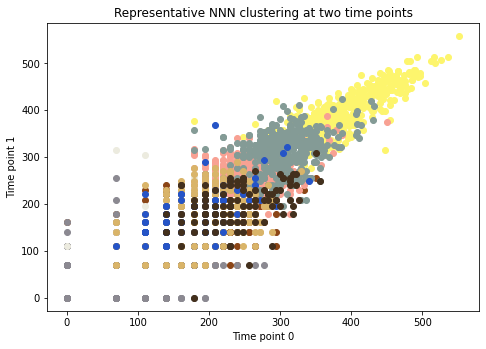

In [21]:
#Representative scatter plot for knn clustering
import matplotlib.pyplot as plt

master_knn_dict = {}
for gene, clust in knn_dict.items():
  master_knn_dict[gene] = clust[0]
print(master_knn_dict)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
t1 = 0
t2 = 1
ax.set_xlabel('Time point {}'.format(t1))
ax.set_ylabel('Time point {}'.format(t2))
ax.set_title('Representative NNN clustering at two time points')

colors = ['#8b4516','#fdf56d','#f8a193','#8b8991','#849b96','#ecebdf','#d9b469','#2554c7','#43301d','#403737','#00375d','#6e2c35','#d8bfcc','#f6c745','#cc92ba','#859de4','#564a6f','#425b5e','#00b1e7','#afca0a','#c9cad3','#66ff66','#56338c','#cf3476']
for i in range(9):
  for gene, clust in master_knn_dict.items():
    if clust == i:
      newX = master_dict.get(gene)[t1]
      newY = master_dict.get(gene)[t2]
      ax.scatter(newX, newY, color = colors[i])  
plt.show()